# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create a query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Print the response to check
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.94, 'feels_like': 59.49, 'temp_min': 59.94, 'temp_max': 59.94, 'pressure': 1015, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1658860120, 'sys': {'type': 1, 'id': 1912, 'country': 'ZA', 'sunrise': 1658811812, 'sunset': 1658849156}, 'timezone': 7200, 'id': 1006984, 'name': 'East London', 'cod': 200}


In [5]:
# Create Lists to hold city information
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
wind = []
date = []
country = []

print("Beginning Data Retrieval/n/-----------------------------")

# Loop through the cities and retrieve data for each list
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City Found: Processing Record for {city}")
    except:
        print(f"City NOT found: {city}")

Beginning Data Retrieval/n/-----------------------------
City Found: Processing Record for butaritari
City NOT found: tumannyy
City Found: Processing Record for atasu
City Found: Processing Record for nikolskoye
City Found: Processing Record for airai
City Found: Processing Record for east london
City NOT found: attawapiskat
City Found: Processing Record for buala
City Found: Processing Record for ushuaia
City Found: Processing Record for iquitos
City Found: Processing Record for saint-philippe
City Found: Processing Record for sangre grande
City Found: Processing Record for hermanus
City Found: Processing Record for tiksi
City Found: Processing Record for fortuna
City Found: Processing Record for kapaa
City NOT found: tapaua
City Found: Processing Record for hobart
City Found: Processing Record for batemans bay
City NOT found: meyungs
City Found: Processing Record for kishtwar
City Found: Processing Record for avera
City Found: Processing Record for ojinaga
City Found: Processing Reco

City Found: Processing Record for chokurdakh
City Found: Processing Record for sur
City Found: Processing Record for mabaruma
City Found: Processing Record for mangai
City Found: Processing Record for polson
City Found: Processing Record for torbay
City Found: Processing Record for gemena
City Found: Processing Record for totness
City Found: Processing Record for cocula
City Found: Processing Record for taitung
City Found: Processing Record for balabac
City Found: Processing Record for barstow
City Found: Processing Record for kodiak
City Found: Processing Record for ostrovnoy
City Found: Processing Record for hamilton
City Found: Processing Record for hilo
City Found: Processing Record for druzhba
City Found: Processing Record for dingle
City Found: Processing Record for fukue
City Found: Processing Record for charters towers
City NOT found: we
City Found: Processing Record for namibe
City NOT found: burica
City Found: Processing Record for hithadhoo
City Found: Processing Record for 

City Found: Processing Record for mount gambier
City Found: Processing Record for raduzhnyy
City Found: Processing Record for tuatapere
City Found: Processing Record for yulara
City Found: Processing Record for vinukonda
City Found: Processing Record for krasnoturansk
City Found: Processing Record for hasaki
City Found: Processing Record for port lincoln
City Found: Processing Record for broken hill
City Found: Processing Record for jalu
City Found: Processing Record for wasco
City Found: Processing Record for luzhou
City NOT found: umzimvubu
City Found: Processing Record for stanovoye
City NOT found: vaitupu
City NOT found: marv dasht
City Found: Processing Record for carndonagh
City Found: Processing Record for uribia
City Found: Processing Record for kishanganj
City Found: Processing Record for samalkot
City Found: Processing Record for itaituba
City Found: Processing Record for nemuro
City Found: Processing Record for kodyma
City Found: Processing Record for nyuksenitsa
City Found:

City Found: Processing Record for uige
City Found: Processing Record for kitgum
City Found: Processing Record for teguise
City Found: Processing Record for vrangel
City Found: Processing Record for gulariya
City Found: Processing Record for vurnary
City NOT found: pokanayevka
City Found: Processing Record for hamadan
City Found: Processing Record for hachinohe
City Found: Processing Record for campbellsville
City Found: Processing Record for san patricio
City Found: Processing Record for moram
City Found: Processing Record for moa
City Found: Processing Record for ulladulla
City Found: Processing Record for barguzin
City Found: Processing Record for barreirinhas
City Found: Processing Record for aksarayskiy
City Found: Processing Record for uyuni
City Found: Processing Record for kutum
City Found: Processing Record for monte azul
City Found: Processing Record for sinazongwe
City NOT found: fort saint john
City Found: Processing Record for dukat
City Found: Processing Record for milazzo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create a data frame using the data retrieved above
weatherDF = pd.DataFrame(
    {
    "City": foundCities,
    "Country": country,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": wind,
    "Latitude": lat,
    "Longitude": lon,
    "Date": date
    }
)
weatherDF.to_csv("city_data.csv", index = False)

weatherDF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,butaritari,KI,81.55,75,12,17.87,3.0707,172.7902,1658860310
1,atasu,KZ,79.88,20,41,15.66,48.6814,71.6433,1658860310
2,nikolskoye,RU,74.80,70,83,6.91,59.7035,30.7861,1658860311
3,airai,TL,53.29,70,100,3.67,-8.9266,125.4092,1658860311
4,east london,ZA,59.94,82,0,8.05,-33.0153,27.9116,1658860120


In [7]:
weatherDF.describe()

,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,71.019751,71.323268,56.740675,7.543623,20.125462,18.677168,1.658860e+09
std,14.158423,21.953492,39.827701,5.064889,32.783384,89.513142,9.305342e+01
min,33.310000,7.000000,0.000000,0.000000,-54.800000,-175.200000,1.658860e+09
25%,62.060000,58.500000,13.000000,3.840000,-6.196400,-59.583350,1.658860e+09
50%,72.390000,78.000000,69.000000,6.220000,22.566700,22.788200,1.658860e+09
75%,80.665000,88.000000,100.000000,10.360000,47.808300,95.386800,1.658860e+09
max,108.280000,100.000000,100.000000,29.210000,78.218600,178.416700,1.658861e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
updatedWeatherDF = weatherDF.drop(weatherDF[weatherDF["Humidity"]>100].index)
updatedWeatherDF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,butaritari,KI,81.55,75,12,17.87,3.0707,172.7902,1658860310
1,atasu,KZ,79.88,20,41,15.66,48.6814,71.6433,1658860310
2,nikolskoye,RU,74.80,70,83,6.91,59.7035,30.7861,1658860311
3,airai,TL,53.29,70,100,3.67,-8.9266,125.4092,1658860311
4,east london,ZA,59.94,82,0,8.05,-33.0153,27.9116,1658860120
...,...,...,...,...,...,...,...,...,...
558,dukat,RU,54.21,49,100,4.41,62.5500,155.5500,1658860510
559,milazzo,IT,84.34,76,0,4.00,38.2212,15.2383,1658860510
560,coxim,BR,95.86,16,0,3.83,-18.5067,-54.7600,1658860511
561,fushe-arrez,AL,76.89,51,0,2.26,42.0622,20.0167,1658860511


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

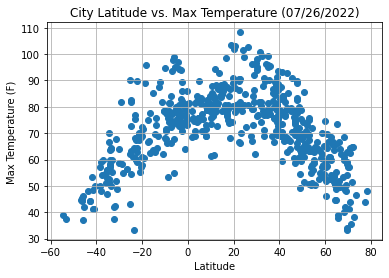

In [29]:
# Generate scatter plot
x = updatedWeatherDF['Latitude']
y = updatedWeatherDF['Temperature']
plt.scatter(x,y)
plt.grid()

# Add labels
plt.title(f"City Latitude vs. Max Temperature (07/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig('../output_data/City Latitude vs. Max Temperature.png')
plt.show()

This plot shows latitude vs. max temperature.

## Latitude vs. Humidity Plot

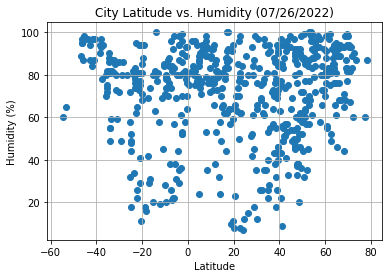

In [30]:
# Generate scatter plot
x = updatedWeatherDF['Latitude']
y = updatedWeatherDF['Humidity']
plt.scatter(x,y)
plt.grid()

# Add labels
plt.title(f"City Latitude vs. Humidity (07/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('../output_data/City Latitude vs. Humidity.png')
plt.show()

This plot shows latitude vs. humidity.

## Latitude vs. Cloudiness Plot

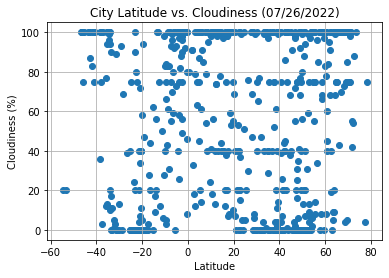

In [31]:
# Generate scatter plot
x = updatedWeatherDF['Latitude']
y = updatedWeatherDF['Cloudiness']
plt.scatter(x,y)
plt.grid()

# Add labels
plt.title(f"City Latitude vs. Cloudiness (07/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('../output_data/City Latitude vs. Cloudiness.png')
plt.show()

This plot shows latitude vs. cloudiness.

## Latitude vs. Wind Speed Plot

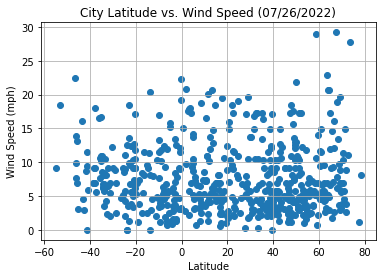

In [32]:
# Generate scatter plot
x = updatedWeatherDF['Latitude']
y = updatedWeatherDF['Windspeed']
plt.scatter(x,y)
plt.grid()

# Add labels
plt.title(f"City Latitude vs. Wind Speed (07/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('../output_data/City Latitude vs. Wind Speed.png')
plt.show()

This plot shows latitude vs. wind speed.

## Linear Regression

In [34]:
# Split up the data into northern and southern hemispheres
northernDF = updatedWeatherDF.loc[updatedWeatherDF["Latitude"] > 0]
southernDF = updatedWeatherDF.loc[updatedWeatherDF["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.6591220827926727


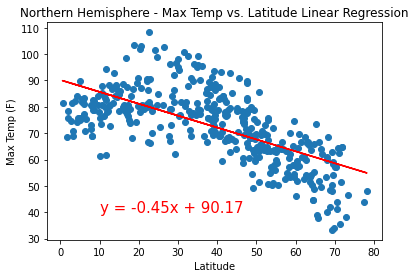

In [40]:
x_values = northernDF["Latitude"]
y_values = northernDF["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Create the linear regression plot and output to a .PNG file
print(f'The r-value is {rvalue}')
plt.savefig('../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7685752107775966


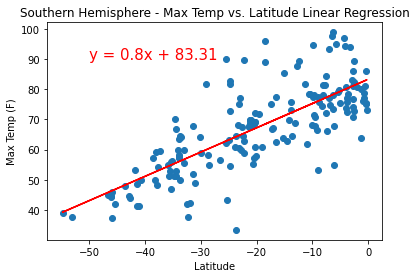

In [41]:
x_values = southernDF["Latitude"]
y_values = southernDF["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Create the linear regression plot and output to a .PNG file
print(f'The r-value is {rvalue}')
plt.savefig('../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

These two plots show the relationship between latitude and max temperatures in the northern and southern hemispheres. There is a relatively strong correlation between max temperatures and latitude. It appears that temperatures increase as the latitude approaches 0 degrees Fahrenheit.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0852798055312754


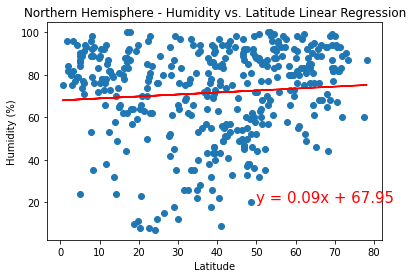

In [42]:
x_values = northernDF["Latitude"]
y_values = northernDF["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Create the linear regression plot and output to a .PNG file
print(f'The r-value is {rvalue}')
plt.savefig('../output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.2326694055486868


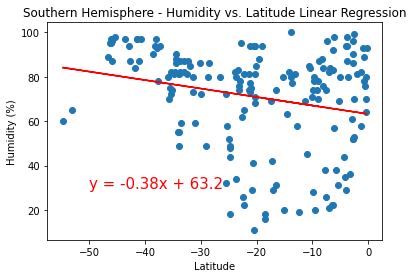

In [43]:
x_values = southernDF["Latitude"]
y_values = southernDF["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Create the linear regression plot and output to a .PNG file
print(f'The r-value is {rvalue}')
plt.savefig('../output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png')
plt.show()

These two plots show the relationship between latitude and humidity in the northern and southern hemispheres. There is a relatively weak correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.030614557142736455


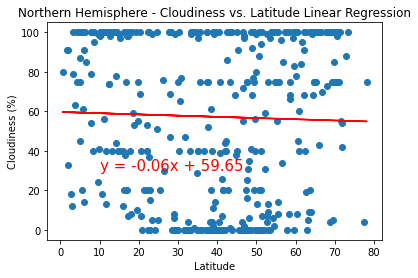

In [44]:
x_values = northernDF["Latitude"]
y_values = northernDF["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Create the linear regression plot and output to a .PNG file
print(f'The r-value is {rvalue}')
plt.savefig('../output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.11225586821773956


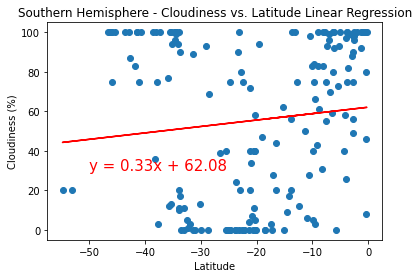

In [45]:
x_values = southernDF["Latitude"]
y_values = southernDF["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Create the linear regression plot and output to a .PNG file
print(f'The r-value is {rvalue}')
plt.savefig('../output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png')
plt.show()

These two plots show the relationship between latitude and cloudiness in the northern and southern hemispheres. There is a relatively weak correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.008161680984543618


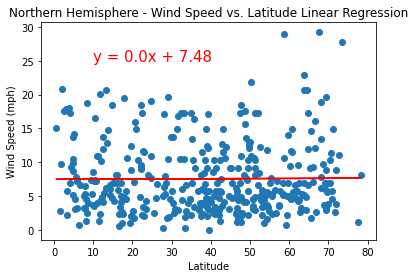

In [47]:
x_values = northernDF["Latitude"]
y_values = northernDF["Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Create the linear regression plot and output to a .PNG file
print(f'The r-value is {rvalue}')
plt.savefig('../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.1977642168627299


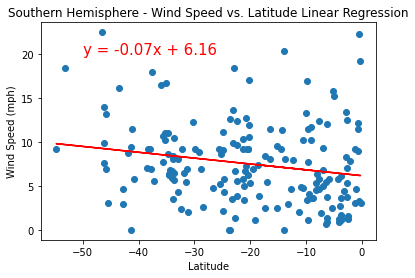

In [49]:
x_values = southernDF["Latitude"]
y_values = southernDF["Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Create the linear regression plot and output to a .PNG file
print(f'The r-value is {rvalue}')
plt.savefig('../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')
plt.show()

These two plots show the relationship between latitude and wind speed in the northern and southern hemispheres. There is a relatively weak correlation between wind speed and latitude.